In [1]:
import mne

In [2]:


import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
from scipy import signal
from sklearn.model_selection import train_test_split
import tensorflow as tf
from sklearn.metrics import confusion_matrix, classification_report
import random

In [3]:
data =pd.read_csv(r"C:\Users\jogip\Desktop\NIT\Data\labels.csv")

In [4]:
data.head(10)

,experiment_code,arousal,valence,emotion
0,SUB01TST04,8,3,fear
1,SUB01TST03,3,1,sad
2,SUB01TST02,5,5,neutral
3,SUB01VID25,8,7,surprise
4,SUB01VID24,4,4,sad
5,SUB01VID23,3,3,sad
6,SUB01VID21,7,1,angry
7,SUB01VID20,8,1,disgust
8,SUB01VID19,2,5,neutral
9,SUB01VID18,8,2,disgust


In [5]:
from glob import glob
import os
import mne
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [6]:
root_path =r"C:\Users\jogip\Desktop\NIT\Data"

In [7]:
label_filepath= root_path+'\labels.csv'
label_df = pd.read_csv(label_filepath)

In [8]:
def get_label( file_path):

  # Extract the filename from the absolute path
  filename = os.path.basename(file_path)

# Split the filename into parts using "_" as the delimiter
  filename_parts = filename.split("_")


# Specify the experiment code you are interested in
  target_experiment_code = filename_parts[0]
  # print('*****',target_experiment_code)
# Use loc to retrieve the arousal value for the specified experiment code
  arousal_value = label_df.loc[label_df['experiment_code'] == target_experiment_code, 'arousal' ].values

  if arousal_value < 4:
      return 0
  else:
      return 1 #arousal_value

In [9]:
root_path

'C:\\Users\\jogip\\Desktop\\NIT\\Data'

In [10]:
eeg_folder_path = root_path+'\Emotiv'+'\Emotiv'

import os

# Specify the root folder
# root_folder = '/path/to/your/root/folder'
fif_file_list =[]
# Walk through the root folder and its subfolders
for folder_path, subfolders, files in os.walk(eeg_folder_path):
    # print(f"Current folder: {folder_path}")
    fif_files = [os.path.join(folder_path, file) for file in files if file.endswith('.fif')]
    fif_file_list.extend(fif_files)
    # print(fif_files)
    # Print all files in the current subfolder
    # for file in fif_files:
    #     file_path = os.path.join(folder_path, file)
    #     print(f"  File: {file_path}")




In [11]:
def read_data(file_path):
    raw = mne.io.read_raw_fif(file_path, preload=True)

    #preprocess funtions
    raw.set_eeg_reference()
    raw.filter(l_freq=1,h_freq=45)
    return raw.get_data()

    # return epochs #trials,channel,length

In [12]:
len(fif_file_list)

487

In [13]:
raw_list = []
labels_list = []

# Iterate through the EEG epoch files in the folder
for file_path in fif_file_list:
    # Load each epoch file using MNE
    label=get_label(file_path)
    labels_list.append(label)
    raw = read_data(file_path)
    raw_list.append(raw)

Opening raw data file C:\Users\jogip\Desktop\NIT\Data\Emotiv\Emotiv\SUB01\SUB01VID01_eeg.fif...
    Range : 0 ... 15616 =      0.000 ...    61.000 secs
Ready.
Reading 0 ... 15616  =      0.000 ...    61.000 secs...
EEG channel type selected for re-referencing
Applying average reference.
Applying a custom ('EEG',) reference.
Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 1 - 45 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 1.00
- Lower transition bandwidth: 1.00 Hz (-6 dB cutoff frequency: 0.50 Hz)
- Upper passband edge: 45.00 Hz
- Upper transition bandwidth: 11.25 Hz (-6 dB cutoff frequency: 50.62 Hz)
- Filter length: 845 samples (3.301 s)

Opening raw data file C:\Users\jogip\Desktop\NIT\Data\Emotiv\Emotiv\SUB01\SUB01VID02_eeg.fif...
    Range : 0 ...

In [14]:
fif_file_list

['C:\\Users\\jogip\\Desktop\\NIT\\Data\\Emotiv\\Emotiv\\SUB01\\SUB01VID01_eeg.fif',
 'C:\\Users\\jogip\\Desktop\\NIT\\Data\\Emotiv\\Emotiv\\SUB01\\SUB01VID02_eeg.fif',
 'C:\\Users\\jogip\\Desktop\\NIT\\Data\\Emotiv\\Emotiv\\SUB01\\SUB01VID03_eeg.fif',
 'C:\\Users\\jogip\\Desktop\\NIT\\Data\\Emotiv\\Emotiv\\SUB01\\SUB01VID04_eeg.fif',
 'C:\\Users\\jogip\\Desktop\\NIT\\Data\\Emotiv\\Emotiv\\SUB01\\SUB01VID05_eeg.fif',
 'C:\\Users\\jogip\\Desktop\\NIT\\Data\\Emotiv\\Emotiv\\SUB01\\SUB01VID07_eeg.fif',
 'C:\\Users\\jogip\\Desktop\\NIT\\Data\\Emotiv\\Emotiv\\SUB01\\SUB01VID08_eeg.fif',
 'C:\\Users\\jogip\\Desktop\\NIT\\Data\\Emotiv\\Emotiv\\SUB01\\SUB01VID09_eeg.fif',
 'C:\\Users\\jogip\\Desktop\\NIT\\Data\\Emotiv\\Emotiv\\SUB01\\SUB01VID10_eeg.fif',
 'C:\\Users\\jogip\\Desktop\\NIT\\Data\\Emotiv\\Emotiv\\SUB01\\SUB01VID11_eeg.fif',
 'C:\\Users\\jogip\\Desktop\\NIT\\Data\\Emotiv\\Emotiv\\SUB01\\SUB01VID12_eeg.fif',
 'C:\\Users\\jogip\\Desktop\\NIT\\Data\\Emotiv\\Emotiv\\SUB01\\SUB01VID13_ee

In [15]:
raw_list

[array([[ 8.88178420e-16, -6.08313367e-01, -1.28426530e+00, ...,
          4.54159610e+00,  2.19140206e+00,  1.12132525e-14],
        [-5.32907052e-15,  3.45390325e+00,  6.03545849e+00, ...,
         -9.56808552e+00, -6.20858969e+00,  8.88178420e-16],
        [ 4.44089210e-15,  2.51299266e-01, -1.41398030e+00, ...,
         -3.97069703e+00, -2.50488011e+00,  2.08166817e-16],
        ...,
        [-2.22044605e-15,  2.15885202e+00,  3.24040086e+00, ...,
         -1.76953067e+01, -1.07120053e+01, -2.29816166e-14],
        [-6.21724894e-15, -3.79721474e+00, -4.55161949e+00, ...,
         -2.19315526e+01, -1.18278701e+01,  7.10542736e-15],
        [ 1.33226763e-15,  3.43816395e+00,  5.81812018e+00, ...,
         -1.37833462e+01, -6.07024738e+00, -2.66453526e-15]]),
 array([[ 1.55431223e-15,  1.82574178e+00,  2.99541859e+00, ...,
          6.24137529e+00,  2.79995080e+00,  1.11022302e-15],
        [-1.77635684e-15,  3.69567976e+00,  7.51818051e+00, ...,
         -4.95469539e+00, -2.61752801e

In [16]:
import numpy as np
from mne.io import read_raw_fif
from scipy.fft import fft

In [17]:
import numpy as np
from mne.io import read_raw_fif
from scipy.fft import fft

# Define a function to apply Fourier transform to each epoch
def apply_fourier_transform(data):
    # Assuming data has shape (channels, samples)
    transformed_data = np.abs(fft(data, axis=1))  # Calculate magnitude of the Fourier transform
    return transformed_data

raw_list_data = []
labels_list = []

# Iterate through the EEG epoch files in the folder
for file_path in fif_file_list:
    # Load each epoch file using MNE
    label = get_label(file_path)
    labels_list.append(label)
    
    # Read raw EEG data
    raw = read_raw_fif(file_path, preload=True)
    data, _ = raw[:, :]  # Get the EEG data as a NumPy array
    
    # Apply Fourier transform to the raw EEG data
    transformed_data = apply_fourier_transform(data)
    
    # Append the transformed data to the raw_list
    raw_list_data.append(transformed_data)


Opening raw data file C:\Users\jogip\Desktop\NIT\Data\Emotiv\Emotiv\SUB01\SUB01VID01_eeg.fif...
    Range : 0 ... 15616 =      0.000 ...    61.000 secs
Ready.
Reading 0 ... 15616  =      0.000 ...    61.000 secs...
Opening raw data file C:\Users\jogip\Desktop\NIT\Data\Emotiv\Emotiv\SUB01\SUB01VID02_eeg.fif...
    Range : 0 ... 30976 =      0.000 ...   121.000 secs
Ready.
Reading 0 ... 30976  =      0.000 ...   121.000 secs...
Opening raw data file C:\Users\jogip\Desktop\NIT\Data\Emotiv\Emotiv\SUB01\SUB01VID03_eeg.fif...
    Range : 0 ... 30976 =      0.000 ...   121.000 secs
Ready.
Reading 0 ... 30976  =      0.000 ...   121.000 secs...
Opening raw data file C:\Users\jogip\Desktop\NIT\Data\Emotiv\Emotiv\SUB01\SUB01VID04_eeg.fif...
    Range : 0 ... 16128 =      0.000 ...    63.000 secs
Ready.
Reading 0 ... 16128  =      0.000 ...    63.000 secs...
Opening raw data file C:\Users\jogip\Desktop\NIT\Data\Emotiv\Emotiv\SUB01\SUB01VID05_eeg.fif...
    Range : 0 ... 46336 =      0.000 ...   1

In [18]:
labels_list

[1,
 1,
 1,
 1,
 1,
 1,
 1,
 0,
 0,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 0,
 1,
 1,
 0,
 1,
 1,
 0,
 1,
 1,
 0,
 1,
 0,
 1,
 0,
 0,
 1,
 1,
 0,
 0,
 1,
 1,
 0,
 1,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 0,
 1,
 1,
 1,
 0,
 1,
 1,
 1,
 1,
 1,
 1,
 0,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 0,
 1,
 0,
 1,
 0,
 1,
 1,
 0,
 1,
 1,
 1,
 1,
 1,
 0,
 1,
 1,
 1,
 0,
 0,
 1,
 1,
 0,
 1,
 0,
 1,
 1,
 0,
 1,
 1,
 0,
 0,
 0,
 1,
 1,
 0,
 0,
 1,
 0,
 0,
 1,
 1,
 1,
 1,
 1,
 0,
 1,
 1,
 1,
 0,
 0,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 0,
 1,
 0,
 1,
 0,
 1,
 1,
 1,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 1,
 1,
 1,
 1,
 0,
 1,
 0,
 1,
 0,
 1,
 0,
 1,
 0,
 1,
 1,
 1,
 0,
 0,
 0,
 1,
 0,
 1,
 0,
 0,
 0,
 1,
 0,
 1,
 0,
 1,
 1,
 1,
 0,
 0,
 1,
 0,
 1,
 0,
 1,
 1,
 1,
 1,
 0,
 1,
 0,
 0,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 0,
 1,
 1,
 1,
 0,


In [19]:
len(raw_list_data)

487

In [34]:
len(labels_list)

487

In [33]:
def make_windowing(X,Y):
    X_new = []
    Y_new = []
    npt = 128 # Window length
    stride = 128 # stride lenth
    ctr = 0
    for i in range(0,X.shape[0]):
        y = Y[i]
        a= X[i,:,:]
        a = a.transpose()
        a.shape
        val = 0
        kd=len(a)
        while val<=(len(a)-npt):
            x = a[val:val+npt,:]

            X_new.append(x.T)
            Y_new.append(y)
            val = val+stride

    return np.array(X_new),np.array(Y_new)

In [22]:
from scipy import stats
def mean(data):
    return np.mean(data,axis=-1)

def std(data):
    return np.std(data,axis=-1)

def ptp(data):
    return np.ptp(data,axis=-1)

def var(data):
      return np.var(data,axis=-1)

def minim(data):
      return np.min(data,axis=-1)


def maxim(data):
      return np.max(data,axis=-1)

def argminim(data):
      return np.argmin(data,axis=-1)


def argmaxim(data):
      return np.argmax(data,axis=-1)

def mean_square(data):
      return np.mean(data**2,axis=-1)

def rms(data): #root mean square
      return  np.sqrt(np.mean(data**2,axis=-1))

def abs_diffs_signal(data):
    return np.sum(np.abs(np.diff(data,axis=-1)),axis=-1)


def skewness(data):
    return stats.skew(data,axis=-1)

def kurtosis(data):
    return stats.kurtosis(data,axis=-1)

def concatenate_features(data):
    return np.concatenate((mean(data),
                           # std(data),
                          # ptp(data),
                          #  var(data),
                          #  minim(data),
                          #  maxim(data),
                          #  argminim(data),
                          #  argmaxim(data),
                            mean_square(data),
                            rms(data),
                         # abs_diffs_signal(data),
                           skewness(data),
                           kurtosis(data)
                          ), axis=-1)

In [23]:
from tqdm import tqdm
features=[]
for raw in tqdm(raw_list):
  features.append(concatenate_features(raw))
features=np.array(features)
labels = np.array(labels_list)

  1%|          | 4/487 [00:00<00:13, 35.61it/s]

100%|██████████| 487/487 [00:13<00:00, 35.30it/s]


In [24]:
features.shape, labels.shape

((487, 70), (487,))

In [25]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn import metrics
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.pipeline import make_pipeline

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(features, labels, test_size=0.1, random_state=42)

# Create a preprocessing pipeline with StandardScaler and PCA
pipeline = make_pipeline(StandardScaler(), PCA(n_components=35))

# Fit and transform the training data
X_train_preprocessed = pipeline.fit_transform(X_train)

# Transform the test data
X_test_preprocessed = pipeline.transform(X_test)

# Train a Random Forest classifier
clf = RandomForestClassifier(n_estimators=35, random_state=42)
clf.fit(X_train_preprocessed, y_train)

# Make predictions on the test set
y_pred = clf.predict(X_test_preprocessed)

# Evaluate the classifier
accuracy = accuracy_score(y_test, y_pred)

precision = metrics.precision_score(y_test, y_pred, average='macro')
recall = metrics.recall_score(y_test, y_pred, average='macro')
f1 = metrics.f1_score(y_test, y_pred, average='macro')

print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("F1-Score:", f1)

#print(f'Accuracy: {accuracy}')

Accuracy: 0.7142857142857143
Precision: 0.5952380952380952
Recall: 0.5598290598290598
F1-Score: 0.5602564102564103


In [26]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.pipeline import make_pipeline

# Assuming 'features' is a 2D array of statistical features and 'labels' is the corresponding labels

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(features, labels, test_size=0.1, random_state=42)

# Create a preprocessing pipeline with StandardScaler and PCA
pipeline = make_pipeline(StandardScaler(), PCA(n_components=10))

# Fit and transform the training data
X_train_preprocessed = pipeline.fit_transform(X_train)

# Transform the test data
X_test_preprocessed = pipeline.transform(X_test)

# Train a Random Forest classifier
rf_clf = RandomForestClassifier(n_estimators=100, random_state=42)
rf_clf.fit(X_train_preprocessed, y_train)

# Train a Support Vector Machine classifier
svm_clf = SVC(kernel='linear', C=1.0, random_state=42)
svm_clf.fit(X_train_preprocessed, y_train)

# Train a k-Nearest Neighbors classifier
knn_clf = KNeighborsClassifier(n_neighbors=5)
knn_clf.fit(X_train_preprocessed, y_train)

# Make predictions on the test set for each classifier
rf_pred = rf_clf.predict(X_test_preprocessed)
svm_pred = svm_clf.predict(X_test_preprocessed)
knn_pred = knn_clf.predict(X_test_preprocessed)

# Evaluate the classifiers
rf_accuracy = accuracy_score(y_test, rf_pred)
svm_accuracy = accuracy_score(y_test, svm_pred)
knn_accuracy = accuracy_score(y_test, knn_pred)

print("Random Forest Accuracy:", rf_accuracy)
print("SVM Accuracy:", svm_accuracy)
print("k-Nearest Neighbors Accuracy:", knn_accuracy)


Random Forest Accuracy: 0.6938775510204082
SVM Accuracy: 0.7346938775510204
k-Nearest Neighbors Accuracy: 0.6938775510204082


In [27]:
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn import metrics
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.pipeline import make_pipeline

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(features, labels, test_size=0.2, random_state=42)

# Create a preprocessing pipeline with StandardScaler and PCA
pipeline = make_pipeline(StandardScaler(), PCA(n_components=35))

# Fit and transform the training data
X_train_preprocessed = pipeline.fit_transform(X_train)

# Transform the test data
X_test_preprocessed = pipeline.transform(X_test)

# Train a Decision Tree classifier
clf = DecisionTreeClassifier(random_state=42)
clf.fit(X_train_preprocessed, y_train)

# Make predictions on the test set
y_pred = clf.predict(X_test_preprocessed)

# Evaluate the classifier
accuracy = accuracy_score(y_test, y_pred)
precision = metrics.precision_score(y_test, y_pred, average='macro')
recall = metrics.recall_score(y_test, y_pred, average='macro')
f1 = metrics.f1_score(y_test, y_pred, average='macro')

print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("F1-Score:", f1)
#print(f'Accuracy: {accuracy}')


Accuracy: 0.5408163265306123
Precision: 0.4554227941176471
Recall: 0.44376811594202903
F1-Score: 0.44339265429761454


In [28]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn import metrics
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.preprocessing import StandardScaler

from sklearn.decomposition import PCA
from sklearn.pipeline import make_pipeline

def evaluate_classifier(X_train, X_test, y_train, y_test, classifier, name):
    # Create a preprocessing pipeline with StandardScaler and PCA
    pipeline = make_pipeline(StandardScaler(), PCA(n_components=35))

    # Fit and transform the training data
    X_train_preprocessed = pipeline.fit_transform(X_train)

    # Transform the test data
    X_test_preprocessed = pipeline.transform(X_test)

    # Train the classifier
    clf = classifier
    clf.fit(X_train_preprocessed, y_train)

    # Make predictions on the test set
    y_pred = clf.predict(X_test_preprocessed)

    # Evaluate the classifier
    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred, average='macro')
    recall = recall_score(y_test, y_pred, average='macro')
    f1 = f1_score(y_test, y_pred, average='macro')

    print(f"Classifier: {name}")
    print("Accuracy:", accuracy)
    print("Precision:", precision)
    print("Recall:", recall)
    print("F1-Score:", f1)
    print()

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(features, labels, test_size=0.1, random_state=42)

# Define classifiers
random_forest_clf = RandomForestClassifier(n_estimators=100, random_state=42)
decision_tree_clf = DecisionTreeClassifier(random_state=42)
svc_clf = SVC(random_state=42)

# Evaluate each classifier
evaluate_classifier(X_train, X_test, y_train, y_test, random_forest_clf, "Random Forest")
evaluate_classifier(X_train, X_test, y_train, y_test, decision_tree_clf, "Decision Tree")
evaluate_classifier(X_train, X_test, y_train, y_test, svc_clf, "SVC")




Classifier: Random Forest
Accuracy: 0.7142857142857143
Precision: 0.5952380952380952
Recall: 0.5598290598290598
F1-Score: 0.5602564102564103

Classifier: Decision Tree
Accuracy: 0.6122448979591837
Precision: 0.5350378787878788
Recall: 0.5395299145299145
F1-Score: 0.5347326336831584

Classifier: SVC
Accuracy: 0.7346938775510204
Precision: 0.3673469387755102
Recall: 0.5
F1-Score: 0.42352941176470593



c:\Users\jogip\deskt\envs\nit\lib\site-packages\sklearn\metrics\_classification.py:1471: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [29]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn import metrics
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.feature_selection import SelectKBest, mutual_info_classif
from sklearn.pipeline import make_pipeline

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(features, labels, test_size=0.1, random_state=42)

# Create a preprocessing pipeline with StandardScaler, PCA, and feature selection
pipeline = make_pipeline(StandardScaler(), PCA(n_components=35), SelectKBest(score_func=mutual_info_classif, k=35))

# Fit and transform the training data
X_train_preprocessed = pipeline.fit_transform(X_train, y_train)

# Transform the test data
X_test_preprocessed = pipeline.transform(X_test)

# Train a Random Forest classifier
clf = RandomForestClassifier(n_estimators=100, random_state=42)
clf.fit(X_train_preprocessed, y_train)

# Make predictions on the test set
y_pred = clf.predict(X_test_preprocessed)

# Evaluate the classifier
accuracy = accuracy_score(y_test, y_pred)

precision = metrics.precision_score(y_test, y_pred, average='macro')
recall = metrics.recall_score(y_test, y_pred, average='macro')
f1 = metrics.f1_score(y_test, y_pred, average='macro')

print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("F1-Score:", f1)


Accuracy: 0.7142857142857143
Precision: 0.5952380952380952
Recall: 0.5598290598290598
F1-Score: 0.5602564102564103


In [30]:
from sklearn.model_selection import GridSearchCV

# Define the parameter grid to search
param_grid = {
    'n_estimators': [50, 100, 150],
    'max_depth': [None, 10, 20],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

# Create a RandomForestClassifier
clf = RandomForestClassifier(random_state=42)

# Create the GridSearchCV object
grid_search = GridSearchCV(clf, param_grid, cv=5, scoring='accuracy')

# Fit the grid search to the data
grid_search.fit(X_train_preprocessed, y_train)

# Print the best parameters and corresponding accuracy
print("Best Parameters: ", grid_search.best_params_)
print("Best Accuracy: ", grid_search.best_score_)

# Use the best model for predictions
best_model = grid_search.best_estimator_
y_pred_tuned = best_model.predict(X_test_preprocessed)

# Evaluate the tuned classifier
accuracy_tuned = accuracy_score(y_test, y_pred_tuned)
precision_tuned = metrics.precision_score(y_test, y_pred_tuned, average='macro')
recall_tuned = metrics.recall_score(y_test, y_pred_tuned, average='macro')
f1_tuned = metrics.f1_score(y_test, y_pred_tuned, average='macro')

print("\nTuned Model Performance:")
print("Accuracy:", accuracy_tuned)
print("Precision:", precision_tuned)
print("Recall:", recall_tuned)
print("F1-Score:", f1_tuned)


Best Parameters:  {'max_depth': 10, 'min_samples_leaf': 2, 'min_samples_split': 10, 'n_estimators': 150}
Best Accuracy:  0.7077847439916406

Tuned Model Performance:
Accuracy: 0.7142857142857143
Precision: 0.536231884057971
Recall: 0.5106837606837606
F1-Score: 0.47713414634146345


In [38]:
len(X_train_preprocessed)

438

In [40]:
len(y_train)

389

In [35]:
from sklearn.model_selection import cross_val_score, StratifiedKFold
from sklearn.ensemble import RandomForestClassifier

# Assuming X_train_preprocessed and y_train are your preprocessed training data
# and labels, respectively

# Create a RandomForestClassifier
clf = RandomForestClassifier(n_estimators=100, random_state=42)

# Specify the number of folds (e.g., 5-fold cross-validation)
num_folds = 5

# Create a StratifiedKFold object for stratified sampling if needed
cv = StratifiedKFold(n_splits=num_folds, shuffle=True, random_state=42)

# Perform cross-validation and calculate accuracy
cross_val_accuracy = cross_val_score(clf, X_train_preprocessed, y_train, cv=cv, scoring='accuracy')

# Print the cross-validation results
print("Cross-Validation Accuracy: {:.2f} (+/- {:.2f})".format(cross_val_accuracy.mean(), cross_val_accuracy.std() * 2))


ValueError: Found input variables with inconsistent numbers of samples: [438, 389]

In [36]:
from sklearn.model_selection import cross_val_score, KFold
from sklearn.ensemble import RandomForestClassifier

# Assuming X_train_preprocessed and y_train are your preprocessed training data
# and labels, respectively

# Create a RandomForestClassifier
clf = RandomForestClassifier(n_estimators=100, random_state=42)

# Specify the number of folds (e.g., 5-fold cross-validation)
num_folds = 5

# Create a KFold object
kf = KFold(n_splits=num_folds, shuffle=True, random_state=42)

# Perform cross-validation and calculate accuracy
cross_val_accuracy = cross_val_score(clf, X_train_preprocessed, y_train, cv=kf, scoring='accuracy')

# Print the cross-validation results
print("Cross-Validation Accuracy: {:.2f} (+/- {:.2f})".format(cross_val_accuracy.mean(), cross_val_accuracy.std() * 2))


ValueError: Found input variables with inconsistent numbers of samples: [438, 389]

Accuracy: 0.7346938775510204


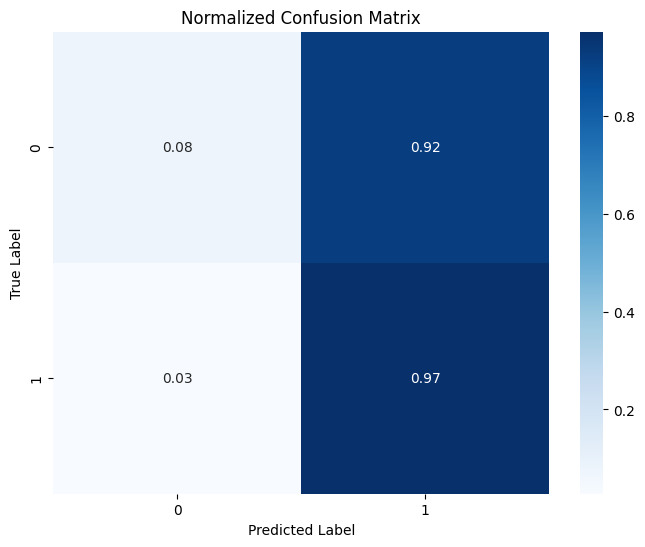

In [31]:
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
from sklearn.linear_model import LogisticRegression
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC  # Replace with the classifier you are using
# Assuming 'y' is the target variable
X_train, X_test, y_train, y_test = train_test_split(features, labels, test_size=0.1, random_state=42)

pipeline = make_pipeline(StandardScaler(), PCA(n_components=35))

# Fit and transform the training data
X_train_preprocessed = pipeline.fit_transform(X_train)

# Transform the test data
X_test_preprocessed = pipeline.transform(X_test)



# Train a classifier (Random Forest as an example)
clf = LogisticRegression()
clf=SVC(kernel='rbf', C=1.0)
clf.fit(X_train, y_train)

# Make predictions on the test set
y_pred = clf.predict(X_test)

# Evaluate the classifier
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy}')


# Compute the confusion matrix
cm = confusion_matrix(y_test, y_pred)

# Normalize the confusion matrix to display proportions
cm_normalized = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]

# Plot the confusion matrix using Seaborn heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(cm_normalized, annot=True, cmap='Blues', fmt=".2f", xticklabels=clf.classes_, yticklabels=clf.classes_)
plt.title('Normalized Confusion Matrix')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()

Best Parameters: {'svc__C': 0.1, 'svc__gamma': 0.1}
Accuracy: 0.7653061224489796


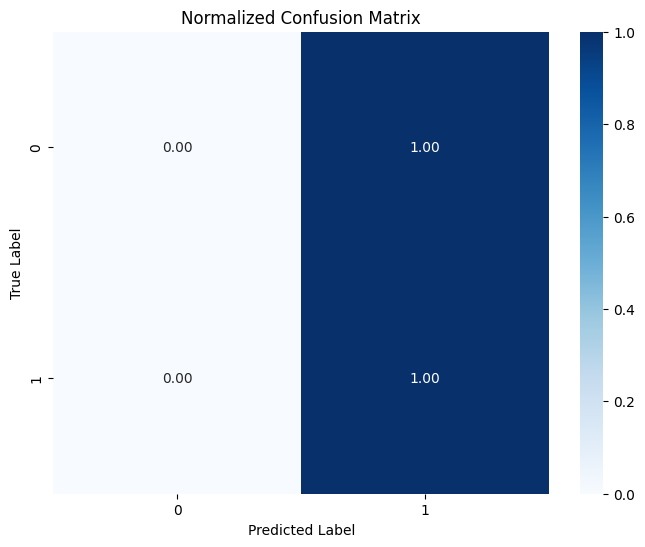

In [32]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix, accuracy_score
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler

# Assuming 'features' is your input data and 'labels' is the target variable

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(features, labels, test_size=0.2, random_state=42)

# Create a pipeline with StandardScaler and SVM
pipeline = make_pipeline(StandardScaler(), SVC(kernel='rbf'))

# Hyperparameter tuning using GridSearchCV
param_grid = {'svc__C': [0.1, 1, 10], 'svc__gamma': [0.1, 0.01, 0.001]}
grid_search = GridSearchCV(pipeline, param_grid, cv=5)
grid_search.fit(X_train, y_train)

# Print the best hyperparameters
print("Best Parameters:", grid_search.best_params_)

# Make predictions on the test set using the best estimator
y_pred = grid_search.best_estimator_.predict(X_test)

# Evaluate the classifier
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy}')

# Compute the confusion matrix
cm = confusion_matrix(y_test, y_pred)

# Normalize the confusion matrix to display proportions
cm_normalized = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]

# Plot the confusion matrix using Seaborn heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(cm_normalized, annot=True, cmap='Blues', fmt=".2f", xticklabels=np.unique(labels), yticklabels=np.unique(labels))
plt.title('Normalized Confusion Matrix')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()


Accuracy: 0.7653061224489796


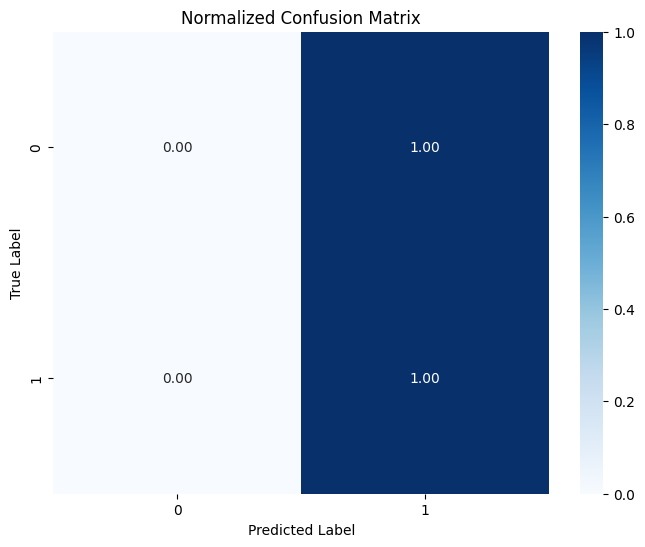

In [41]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix, accuracy_score
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.preprocessing import StandardScaler

# Assuming 'features' is your input data and 'labels' is the target variable

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(features, labels, test_size=0.2, random_state=42)

# Create a pipeline with only StandardScaler and SVC
svc_pipeline = make_pipeline(StandardScaler(), SVC(kernel='rbf', C=1, gamma=0.1))  # You can adjust C and gamma

# Fit the model
svc_pipeline.fit(X_train, y_train)

# Make predictions on the test set
y_pred = svc_pipeline.predict(X_test)

# Evaluate the classifier
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy}')

# Compute the confusion matrix
cm = confusion_matrix(y_test, y_pred)

# Normalize the confusion matrix to display proportions
cm_normalized = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]

# Plot the confusion matrix using Seaborn heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(cm_normalized, annot=True, cmap='Blues', fmt=".2f", xticklabels=np.unique(labels), yticklabels=np.unique(labels))
plt.title('Normalized Confusion Matrix')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()


Best Parameters: {'svc__C': 0.1, 'svc__gamma': 0.1}
Accuracy: 0.7653061224489796


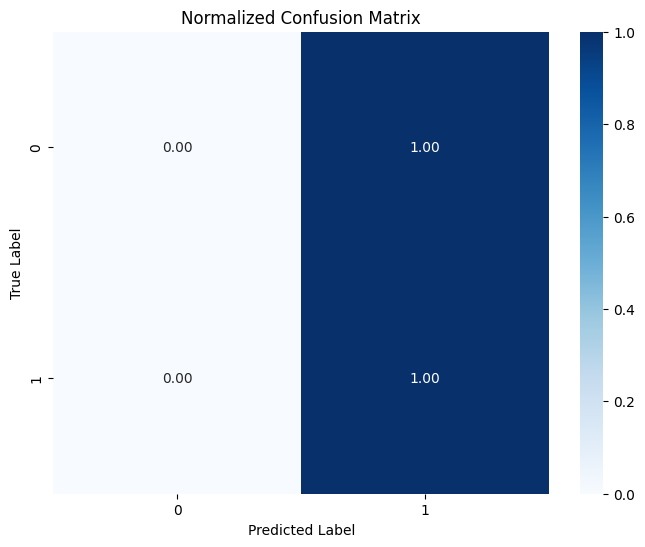

In [44]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix, accuracy_score
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.svm import SVC
from sklearn.preprocessing import StandardScaler

# Assuming 'features' is your input data and 'labels' is the target variable

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(features, labels, test_size=0.2, random_state=42)

# Create a pipeline with StandardScaler and SVC
svc_pipeline = make_pipeline(StandardScaler(), SVC(kernel='rbf'))

# Define the hyperparameter grid for SVC
param_grid = {'svc__C': [0.1, 1, 100], 'svc__gamma': [0.1, 0.01, 0.001]}

# Create a GridSearchCV object
grid_search = GridSearchCV(svc_pipeline, param_grid, cv=5)

# Fit the GridSearchCV object to the training data
grid_search.fit(X_train, y_train)

# Print the best hyperparameters
print("Best Parameters:", grid_search.best_params_)

# Make predictions on the test set using the best estimator
y_pred = grid_search.best_estimator_.predict(X_test)

# Evaluate the classifier
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy}')

# Compute the confusion matrix
cm = confusion_matrix(y_test, y_pred)

# Normalize the confusion matrix to display proportions
cm_normalized = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]

# Plot the confusion matrix using Seaborn heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(cm_normalized, annot=True, cmap='Blues', fmt=".2f", xticklabels=np.unique(labels), yticklabels=np.unique(labels))
plt.title('Normalized Confusion Matrix')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()


Best Parameters: {'svc__gamma': 1000.0, 'svc__C': 0.01}
Accuracy: 0.7653061224489796


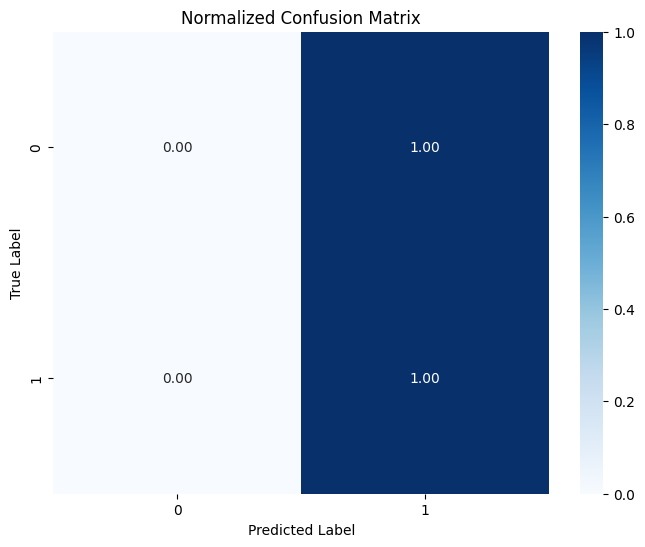

In [43]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix, accuracy_score
from sklearn.model_selection import train_test_split, RandomizedSearchCV
from sklearn.svm import SVC
from sklearn.preprocessing import StandardScaler

# Assuming 'features' is your input data and 'labels' is the target variable

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(features, labels, test_size=0.2, random_state=42)

# Create a pipeline with StandardScaler and SVC
svc_pipeline = make_pipeline(StandardScaler(), SVC(kernel='rbf'))

# Define the hyperparameter distributions for Randomized Search
param_dist = {'svc__C': np.logspace(-3, 3, 7), 'svc__gamma': np.logspace(-3, 3, 7)}

# Create a RandomizedSearchCV object
random_search = RandomizedSearchCV(svc_pipeline, param_distributions=param_dist, n_iter=10, cv=5, random_state=42)

# Fit the RandomizedSearchCV object to the training data
random_search.fit(X_train, y_train)

# Print the best hyperparameters
print("Best Parameters:", random_search.best_params_)

# Make predictions on the test set using the best estimator
y_pred = random_search.best_estimator_.predict(X_test)

# Evaluate the classifier
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy}')

# Compute the confusion matrix
cm = confusion_matrix(y_test, y_pred)

# Normalize the confusion matrix to display proportions
cm_normalized = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]

# Plot the confusion matrix using Seaborn heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(cm_normalized, annot=True, cmap='Blues', fmt=".2f", xticklabels=np.unique(labels), yticklabels=np.unique(labels))
plt.title('Normalized Confusion Matrix')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()


Best Parameters: {'svc__gamma': 1000.0, 'svc__C': 0.01}
Accuracy: 0.7653061224489796


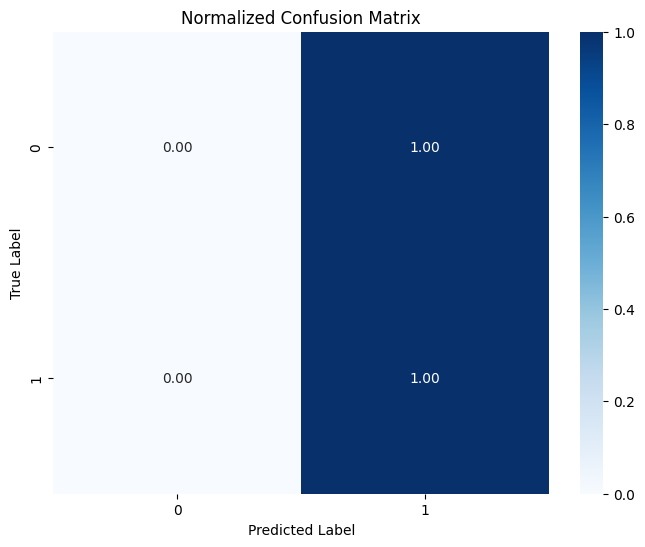

In [45]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix, accuracy_score
from sklearn.model_selection import train_test_split, RandomizedSearchCV
from sklearn.svm import SVC
from sklearn.preprocessing import StandardScaler

# Assuming 'features' is your input data and 'labels' is the target variable

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(features, labels, test_size=0.2, random_state=42)

# Create a pipeline with StandardScaler and SVC
svc_pipeline = make_pipeline(StandardScaler(), SVC(kernel='rbf'))

# Define the hyperparameter distributions for Randomized Search
param_dist = {'svc__C': np.logspace(-3, 3, 7), 'svc__gamma': np.logspace(-3, 3, 7)}

# Create a RandomizedSearchCV object
random_search = RandomizedSearchCV(svc_pipeline, param_distributions=param_dist, n_iter=10, cv=5, random_state=42)

# Fit the RandomizedSearchCV object to the training data
random_search.fit(X_train, y_train)

# Print the best hyperparameters
print("Best Parameters:", random_search.best_params_)

# Make predictions on the test set using the best estimator
y_pred = random_search.best_estimator_.predict(X_test)

# Evaluate the classifier
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy}')

# Compute the confusion matrix
cm = confusion_matrix(y_test, y_pred)

# Normalize the confusion matrix to display proportions
cm_normalized = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]

# Plot the confusion matrix using Seaborn heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(cm_normalized, annot=True, cmap='Blues', fmt=".2f", xticklabels=np.unique(labels), yticklabels=np.unique(labels))
plt.title('Normalized Confusion Matrix')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()


Best Parameters: OrderedDict([('svc__C', 3.6914993871072475), ('svc__gamma', 0.3471439258256353)])
Accuracy: 0.7551020408163265


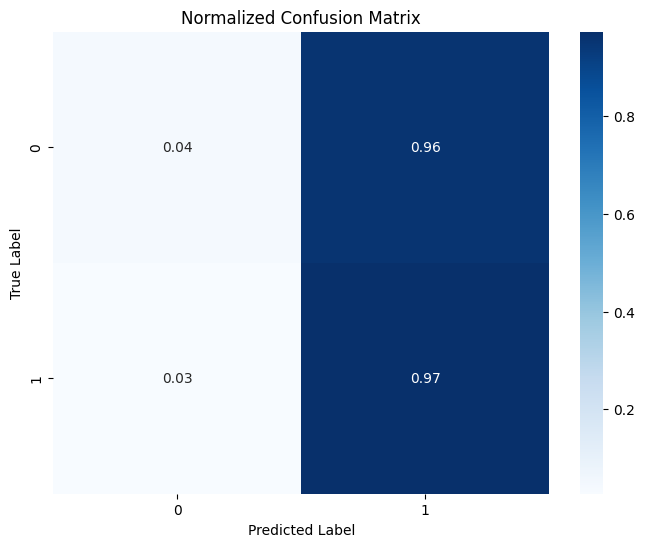

In [48]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix, accuracy_score
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.preprocessing import StandardScaler
from skopt import BayesSearchCV

# Assuming 'features' is your input data and 'labels' is the target variable

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(features, labels, test_size=0.2, random_state=42)

# Create a pipeline with StandardScaler and SVC
svc_pipeline = make_pipeline(StandardScaler(), SVC(kernel='rbf'))

# Define the hyperparameter search space for Bayesian Optimization
param_space = {'svc__C': (0.1, 10.0, 'log-uniform'), 'svc__gamma': (0.01, 1.0, 'log-uniform')}

# Create a BayesSearchCV object
bayes_search = BayesSearchCV(svc_pipeline, param_space, n_iter=50, cv=5, n_jobs=-1)

# Fit the BayesSearchCV object to the training data
bayes_search.fit(X_train, y_train)

# Print the best hyperparameters
print("Best Parameters:", bayes_search.best_params_)

# Make predictions on the test set using the best estimator
y_pred = bayes_search.best_estimator_.predict(X_test)

# Evaluate the classifier
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy}')

# Compute the confusion matrix
cm = confusion_matrix(y_test, y_pred)

# Normalize the confusion matrix to display proportions
cm_normalized = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]

# Plot the confusion matrix using Seaborn heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(cm_normalized, annot=True, cmap='Blues', fmt=".2f", xticklabels=np.unique(labels), yticklabels=np.unique(labels))
plt.title('Normalized Confusion Matrix')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()


In [47]:
!pip install scikit-optimize


     ---------------------------------------- 0.0/100.3 kB ? eta -:--:--
     ----------------------------------- --- 92.2/100.3 kB 1.7 MB/s eta 0:00:01
     -------------------------------------- 100.3/100.3 kB 1.9 MB/s eta 0:00:00
  Using cached PyYAML-6.0.1-cp39-cp39-win_amd64.whl.metadata (2.1 kB)
Using cached PyYAML-6.0.1-cp39-cp39-win_amd64.whl (152 kB)


Epoch 1/60
10/10 [==============================] - 1s 19ms/step - loss: 0.7106 - accuracy: 0.5338 - val_loss: 0.6891 - val_accuracy: 0.6795
Epoch 2/60
10/10 [==============================] - 0s 6ms/step - loss: 0.5983 - accuracy: 0.6785 - val_loss: 0.6512 - val_accuracy: 0.7051
Epoch 3/60
10/10 [==============================] - 0s 6ms/step - loss: 0.5824 - accuracy: 0.6977 - val_loss: 0.6461 - val_accuracy: 0.7308
Epoch 4/60
10/10 [==============================] - 0s 6ms/step - loss: 0.5549 - accuracy: 0.7138 - val_loss: 0.6526 - val_accuracy: 0.7051
Epoch 5/60
10/10 [==============================] - 0s 6ms/step - loss: 0.5311 - accuracy: 0.7235 - val_loss: 0.6524 - val_accuracy: 0.7051
Epoch 6/60
10/10 [==============================] - 0s 5ms/step - loss: 0.5149 - accuracy: 0.7395 - val_loss: 0.6474 - val_accuracy: 0.7308
Epoch 7/60
10/10 [==============================] - 0s 6ms/step - loss: 0.5021 - accuracy: 0.7492 - val_loss: 0.6449 - val_accuracy: 0.7308
Epoch 8/60
10/10 [=

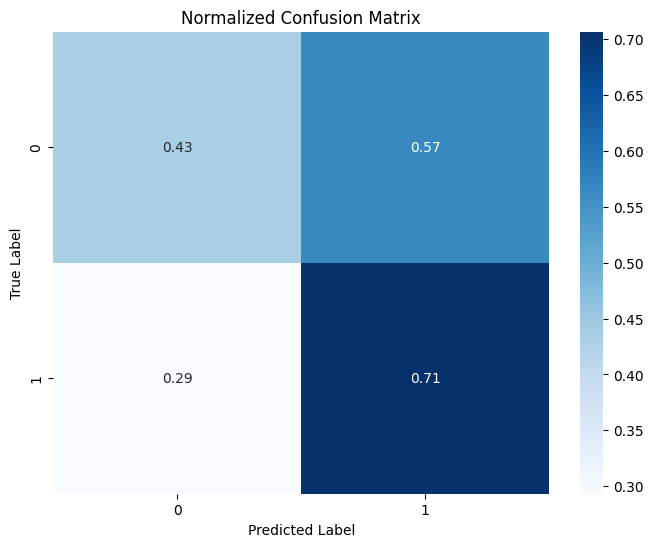

In [50]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix, accuracy_score
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import LabelEncoder
from tensorflow import keras
from tensorflow.keras import layers

# Assuming 'features' is your input data and 'labels' is the target variable

# Encode labels if they are strings
label_encoder = LabelEncoder()
labels_encoded = label_encoder.fit_transform(labels)

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(features, labels_encoded, test_size=0.2, random_state=42)

# Standardize the input features
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Build a simple neural network using Keras
model = keras.Sequential([
    layers.InputLayer(input_shape=(X_train.shape[1],)),
    layers.Dense(64, activation='relu'),
    layers.Dense(32, activation='relu'),
    layers.Dense(len(np.unique(labels)), activation='softmax')  # Adjust the output layer based on the number of classes
])

# Compile the model
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

# Train the model
history = model.fit(X_train, y_train, epochs=20, validation_split=0.2, verbose=1)

# Evaluate the model on the test set
y_pred_prob = model.predict(X_test)
y_pred = np.argmax(y_pred_prob, axis=1)

# Convert back to original labels
y_test_original = label_encoder.inverse_transform(y_test)
y_pred_original = label_encoder.inverse_transform(y_pred)

# Evaluate the classifier
accuracy = accuracy_score(y_test_original, y_pred_original)
print(f'Accuracy: {accuracy}')

# Compute the confusion matrix
cm = confusion_matrix(y_test_original, y_pred_original)

# Normalize the confusion matrix to display proportions
cm_normalized = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]

# Plot the confusion matrix using Seaborn heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(cm_normalized, annot=True, cmap='Blues', fmt=".2f", xticklabels=np.unique(labels), yticklabels=np.unique(labels))
plt.title('Normalized Confusion Matrix')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()
